# Proyek Akhir:
Analisa Tingkat Karyawan yang Keluar dari Perusahan Jaya Jaya Maju

- Nama: Wiefran Varenzo
- Email: lionwiefran88@gmail.com
- Id Dicoding: Wiefran

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import ttest_ind
from google.colab import files
from imblearn.over_sampling import SMOTE

In [2]:
import sklearn
print(sklearn.__version__)

1.2.2


In [3]:
import imblearn
print(imblearn.__version__)

0.10.1


### Menyiapkan data yang akan diguankan

In [4]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv'
df = pd.read_csv(url)

In [5]:
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [7]:
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [8]:
df['Attrition'] = df['Attrition'].fillna(0)

## Data Understanding

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1470 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [10]:
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.121769,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.327130,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Jumlah karyawan yang mengalami attrition:
Attrition
0.0    1291
1.0     179
Name: count, dtype: int64
Jenis data yang ada:  3  dan 4
Jenis data yang ada:  [3 1 2 4]


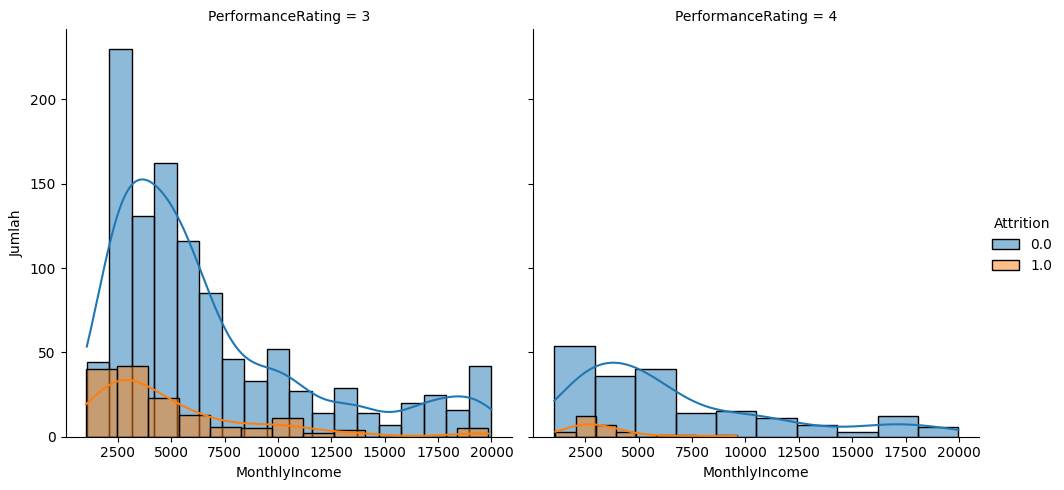

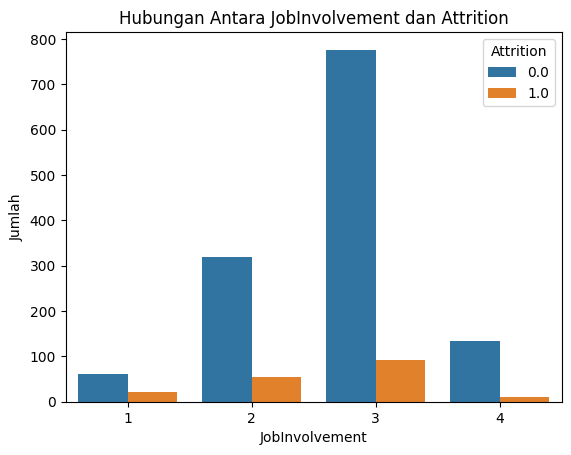

In [12]:
attrition_counts = df['Attrition'].value_counts()
print("Jumlah karyawan yang mengalami attrition:")
print(attrition_counts)

unique_values = df['PerformanceRating'].unique()
print("Jenis data yang ada: ",unique_values[0] ," dan",unique_values[1])

unique_values = df['JobInvolvement'].unique()
print("Jenis data yang ada: ",unique_values)

# Membuat facet plot berdasarkan PerformanceRating
g = sns.FacetGrid(df, col='PerformanceRating', hue='Attrition', height=5)
g.map(sns.histplot, 'MonthlyIncome', kde=True)
g.set_titles('PerformanceRating = {col_name}')
g.set_axis_labels('MonthlyIncome', 'Jumlah')
g.add_legend(title='Attrition')
plt.show()

sns.countplot(data=df, x='JobInvolvement', hue='Attrition')
plt.title('Hubungan Antara JobInvolvement dan Attrition')
plt.xlabel('JobInvolvement')
plt.ylabel('Jumlah')
plt.show()


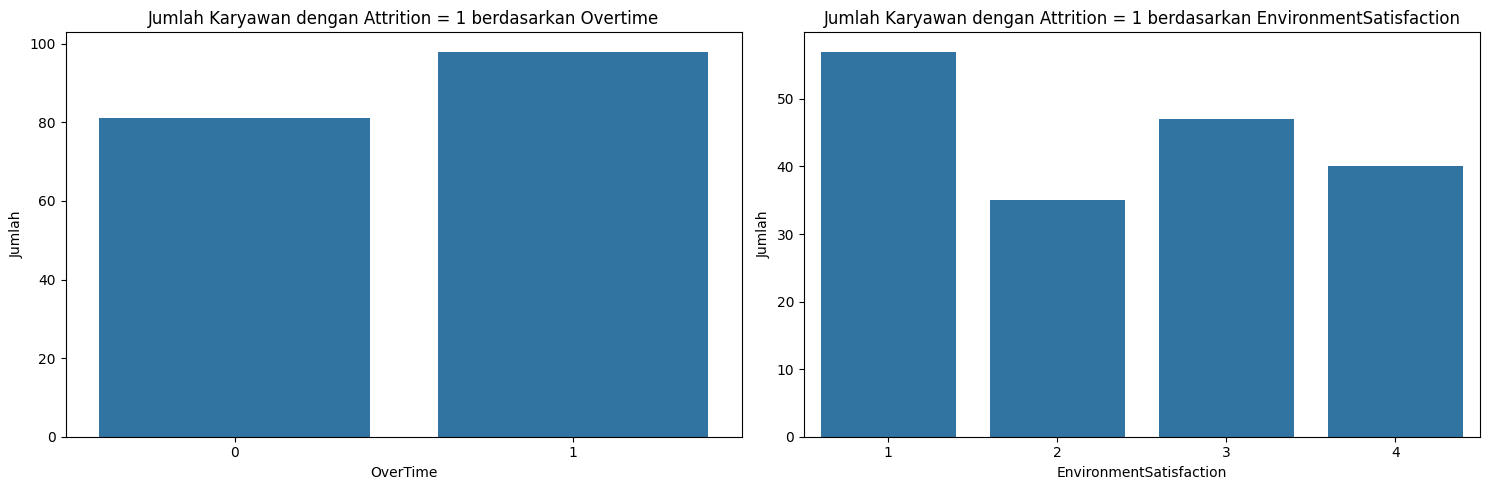

In [13]:
plt.figure(figsize=(15, 5))
df_attrition_1 = df[df['Attrition'] == 1]
# Subplot pertama: countplot OverTime
plt.subplot(1, 2, 1)
sns.countplot(data=df_attrition_1, x='OverTime')
plt.title('Jumlah Karyawan dengan Attrition = 1 berdasarkan Overtime')
plt.xlabel('OverTime')
plt.ylabel('Jumlah')

# Subplot kedua: countplot EnvironmentSatisfaction
plt.subplot(1, 2, 2)
sns.countplot(data=df_attrition_1, x='EnvironmentSatisfaction')
plt.title('Jumlah Karyawan dengan Attrition = 1 berdasarkan EnvironmentSatisfaction')
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()


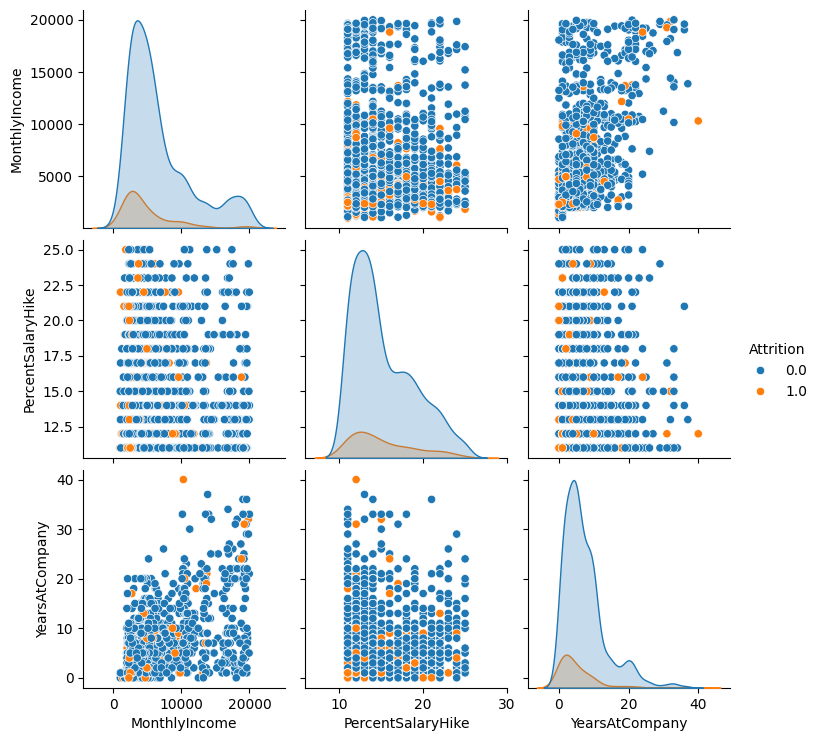

In [14]:
sns.pairplot(df[['MonthlyIncome', 'PercentSalaryHike', 'YearsAtCompany', 'Attrition']], hue='Attrition')
plt.show()


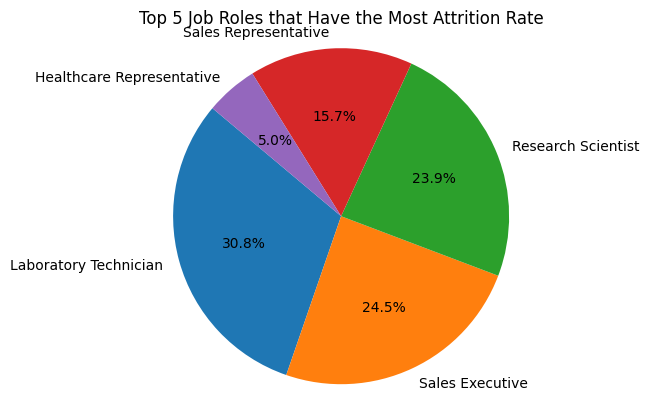

In [15]:
df_attrition_1 = df[df['Attrition'] == 1]

# Hitung jumlah karyawan untuk setiap 'JobRole'
jobrole_counts = df_attrition_1['JobRole'].value_counts()

top_5_jobroles = jobrole_counts.nlargest(5)

# Buat diagram lingkaran
plt.pie(top_5_jobroles, labels=top_5_jobroles.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Job Roles that Have the Most Attrition Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

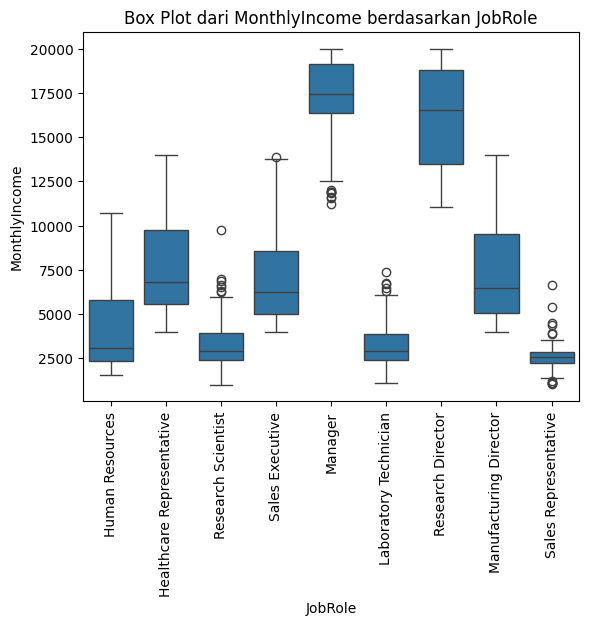

In [16]:
sns.boxplot(data=df, x='JobRole', y='MonthlyIncome')
plt.title('Box Plot dari MonthlyIncome berdasarkan JobRole')
plt.xlabel('JobRole')
plt.ylabel('MonthlyIncome')
plt.xticks(rotation=90)
plt.show()


In [17]:
overtime_count = df[df['OverTime'] == 1].groupby('JobRole').size().reset_index(name='OvertimeYesCount')

# Menampilkan JobRole dengan jumlah Overtime 'Yes' terbanyak
top_overtime_jobrole = overtime_count.sort_values(by='OvertimeYesCount', ascending=False).iloc[0]

print("JobRole dengan jumlah Overtime 'Yes' terbanyak:")
print(top_overtime_jobrole)

JobRole dengan jumlah Overtime 'Yes' terbanyak:
JobRole             Research Scientist
OvertimeYesCount                    97
Name: 6, dtype: object


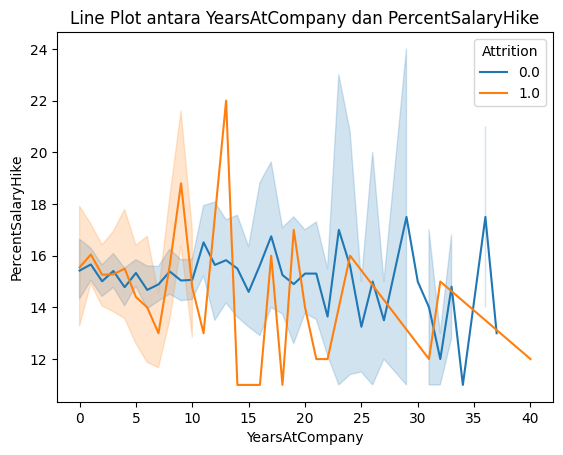

In [18]:
sns.lineplot(data=df, x='YearsAtCompany', y='PercentSalaryHike', hue='Attrition')
plt.title('Line Plot antara YearsAtCompany dan PercentSalaryHike')
plt.xlabel('YearsAtCompany')
plt.ylabel('PercentSalaryHike')
plt.show()

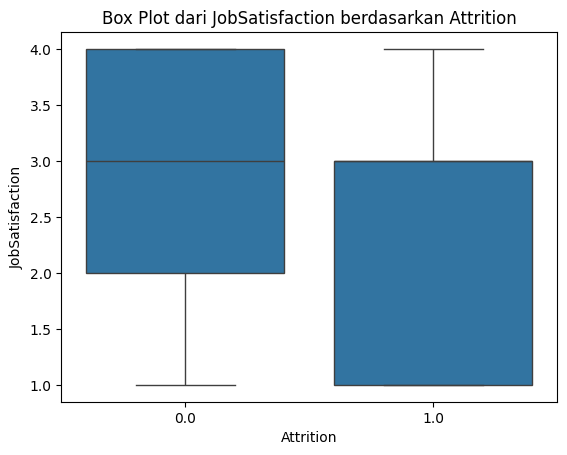

In [19]:
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction')
plt.title('Box Plot dari JobSatisfaction berdasarkan Attrition')
plt.xlabel('Attrition')
plt.ylabel('JobSatisfaction')
plt.show()

Descriptive statistics for MonthlyIncome by Attrition:
            count         mean          std     min     25%     50%     75%  \
Attrition                                                                     
0.0        1291.0  6728.933385  4777.087268  1051.0  3067.5  5130.0  8706.0   
1.0         179.0  4872.938547  3807.243146  1009.0  2391.5  3388.0  5872.0   

               max  
Attrition           
0.0        19999.0  
1.0        19859.0  


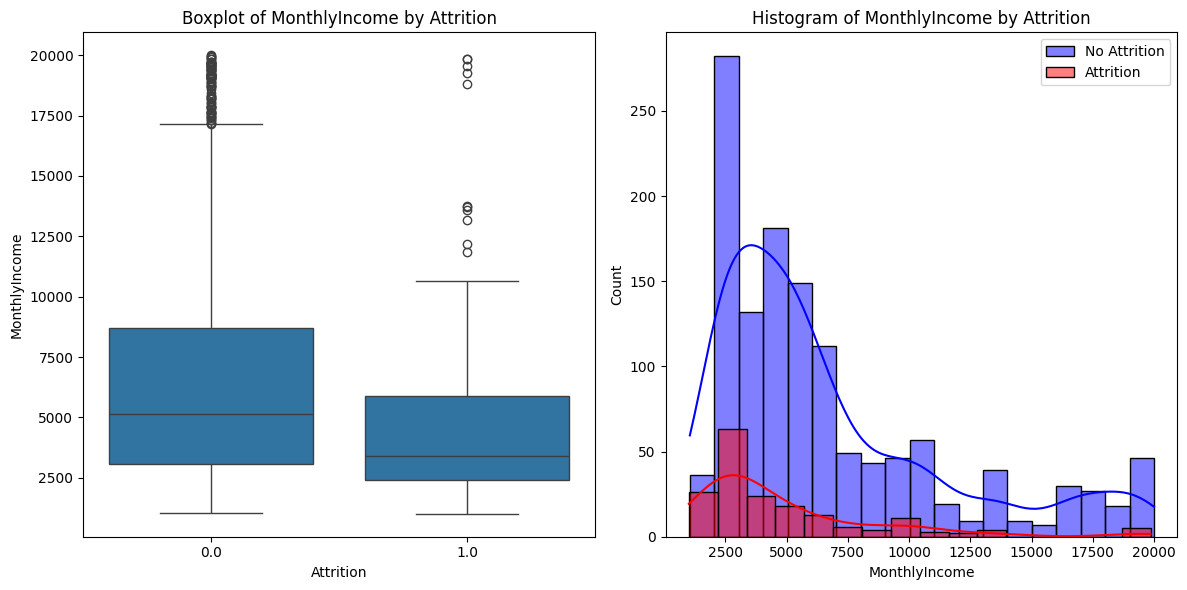

T-test: t-statistic = -5.909047743356807, p-value = 1.0643884344188464e-08


In [20]:
attrition_stats = df.groupby('Attrition')['MonthlyIncome'].describe()
print("Descriptive statistics for MonthlyIncome by Attrition:")
print(attrition_stats)

# Visualization
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Boxplot of MonthlyIncome by Attrition')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(df[df['Attrition'] == 0]['MonthlyIncome'], kde=True, color='blue', label='No Attrition')
sns.histplot(df[df['Attrition'] == 1]['MonthlyIncome'], kde=True, color='red', label='Attrition')
plt.title('Histogram of MonthlyIncome by Attrition')
plt.legend()

plt.tight_layout()
plt.show()

# Statistical test
attrition_income = df[df['Attrition'] == 1]['MonthlyIncome']
no_attrition_income = df[df['Attrition'] == 0]['MonthlyIncome']

t_stat, p_value = ttest_ind(attrition_income, no_attrition_income, equal_var=False)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")


## Data Preparation / Preprocessing

In [21]:
categorical_columns = ['BusinessTravel', 'Department', 'EducationField']
for column in categorical_columns:
    if column in df.columns:
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
    else:
        print(f"Column '{column}' not found in the DataFrame")

features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
            'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
            'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
            'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel',
            'Department', 'EducationField']

missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Missing features: {missing_features}")
    features = [feature for feature in features if feature in df.columns]

X = df[features]
y = df['Attrition']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## Modeling

Best parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}
Accuracy: 0.9052224371373307

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91       265
         1.0       0.91      0.90      0.90       252

    accuracy                           0.91       517
   macro avg       0.91      0.91      0.91       517
weighted avg       0.91      0.91      0.91       517

Precision for class 0: 0.9029850746268657
Precision for class 1: 0.9076305220883534


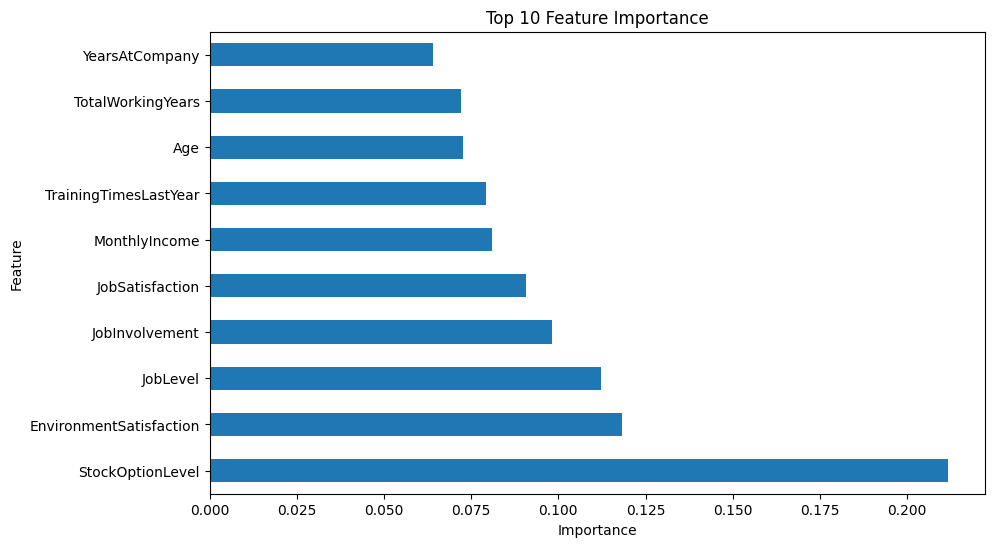

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

initial_model = RandomForestClassifier(random_state=42)
initial_model.fit(X_train, y_train)
initial_feature_importances = pd.Series(initial_model.feature_importances_, index=features)
top_features = initial_feature_importances.nlargest(10).index.tolist()

# Use only the top features for training
X_train_top = X_train[:, [features.index(f) for f in top_features]]
X_test_top = X_test[:, [features.index(f) for f in top_features]]

# Hyperparameter tuning using RandomizedSearchCV with class weights
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # Avoid 'auto' due to deprecation
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample']
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_distributions,
                                   n_iter=20,  # Number of parameter settings sampled
                                   cv=3,  # Number of cross-validation folds
                                   n_jobs=-1,  # Use all available CPUs
                                   random_state=42,
                                   scoring='precision')
random_search.fit(X_train_top, y_train)

# Best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print("Best parameters:", best_params)

model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train_top, y_train)

y_pred = model.predict(X_test_top)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred, average=None)
print("Precision for class 0:", precision[0])
print("Precision for class 1:", precision[1])

# Feature Importances
feature_importances = pd.Series(model.feature_importances_, index=top_features)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Evaluation

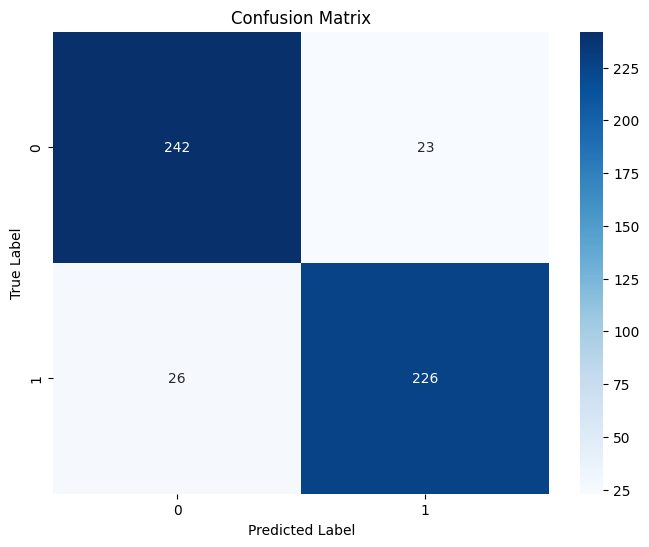

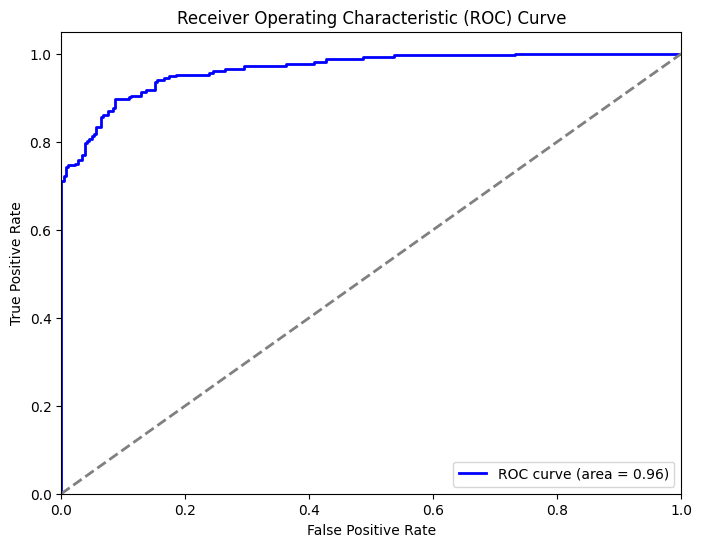

In [23]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC curve
y_prob = model.predict_proba(X_test_top)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()